# Recursive Feature Selection using Gradient based and Tree based Estimators 

In [2]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\anjal\anaconda3\lib\site-packages (0.7.0)Note: you may need to restart the kernel to use updated packages.



In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

In [4]:
data = pd.read_csv('../data/profile_labelled.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.sample(10)

,gender,age,cust_id,became_member_on,days_as_member,income_in_k,Total offer completed,Total offer received,Total offer viewed,Total transaction,offer completed_via_email,offer completed_via_social,offer completed_via_mobile,offer completed_via_web,offer completed bogo count,offer completed discount count,offer received_via_email,offer received_via_social,offer received_via_mobile,offer received_via_web,offer received bogo count,offer received discount count,offer received informational count,offer viewed_via_email,offer viewed_via_social,offer viewed_via_mobile,offer viewed_via_web,offer viewed bogo count,offer viewed discount count,offer viewed informational count,Total transaction amount,avg_difficulty,avg_duration,total_reward_received,total_reward_defined,total_view_ratio,total_completion_ratio,avg_transaction_amt,transactions_per_membership_days,customer_type
9134,F,47,81df57a262b347ec93f12b09ec813b57,2017-10-19,1139,42.0,4.0,5.0,5.0,13.0,4.0,3.0,4.0,3.0,1.0,3.0,5.0,4.0,5.0,3.0,1.0,3.0,1.0,5.0,4.0,5.0,3.0,1.0,3.0,1.0,114.40,8.571429,185.142857,16.0,16.0,1.00,0.800,8.80,0.011414,active
7156,M,43,cadd7084f71e45faac25ea898e03fabc,2014-01-27,2500,73.0,2.0,5.0,4.0,26.0,2.0,2.0,2.0,2.0,1.0,1.0,5.0,4.0,4.0,4.0,3.0,2.0,0.0,4.0,4.0,4.0,3.0,3.0,1.0,0.0,78.51,10.909091,172.363636,12.0,37.0,0.80,0.400,3.02,0.010400,active
11502,M,47,93399ad651534dcf9a8dbca6dfd3783e,2015-11-20,1838,50.0,3.0,5.0,5.0,16.0,3.0,2.0,3.0,3.0,1.0,2.0,5.0,2.0,5.0,5.0,1.0,2.0,2.0,5.0,2.0,5.0,5.0,1.0,2.0,2.0,198.10,5.076923,162.461538,10.0,10.0,1.00,0.600,12.38,0.008705,active
12981,M,29,8bb69effdb0140a2b18280fc70814315,2016-10-08,1515,47.0,3.0,3.0,2.0,12.0,3.0,1.0,3.0,3.0,2.0,1.0,3.0,1.0,3.0,3.0,2.0,1.0,0.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,145.78,6.250000,150.000000,12.0,12.0,0.67,1.000,12.15,0.007921,active
10631,M,38,32fb5f395ecc4929a84f7662c456ff72,2017-07-27,1223,40.0,4.0,4.0,4.0,14.0,4.0,2.0,4.0,4.0,4.0,0.0,4.0,2.0,4.0,4.0,4.0,0.0,0.0,4.0,2.0,4.0,4.0,4.0,0.0,0.0,137.39,5.000000,144.000000,20.0,20.0,1.00,1.000,9.81,0.011447,active
7279,M,20,231f39abf1c14080916f5f81856f7d05,2015-12-03,1825,45.0,3.0,3.0,3.0,12.0,3.0,3.0,3.0,2.0,2.0,1.0,3.0,3.0,3.0,2.0,2.0,1.0,0.0,3.0,3.0,3.0,2.0,2.0,1.0,0.0,101.76,7.333333,152.000000,18.0,18.0,1.00,1.000,8.48,0.006575,active
3361,M,78,505672e0c12e4f77a4461641b004bd5d,2017-12-09,1088,33.0,5.0,5.0,5.0,12.0,5.0,2.0,3.0,4.0,1.0,4.0,5.0,2.0,3.0,4.0,1.0,4.0,0.0,5.0,2.0,3.0,4.0,1.0,4.0,0.0,100.52,14.000000,211.200000,24.0,24.0,1.00,1.000,8.38,0.011029,active
4976,F,49,154dfaa196014a438640028a7e4101d4,2018-01-18,1048,54.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.08,10.000000,168.000000,0.0,5.0,0.00,0.000,3.54,0.001908,passive
4558,F,56,9061463d5dca462e929d07a3481417ec,2015-02-23,2108,54.0,5.0,6.0,5.0,8.0,5.0,1.0,4.0,5.0,3.0,2.0,6.0,2.0,5.0,5.0,3.0,2.0,1.0,5.0,2.0,5.0,4.0,3.0,1.0,1.0,127.74,7.187500,156.000000,22.0,22.0,0.83,0.833,15.97,0.003795,active
381,M,62,05dedca5b2034055a64979a2c28b3477,2017-12-08,1089,70.0,3.0,4.0,4.0,7.0,3.0,2.0,3.0,3.0,1.0,2.0,4.0,3.0,4.0,3.0,1.0,2.0,1.0,4.0,3.0,4.0,3.0,1.0,2.0,1.0,105.70,8.181818,157.090909,14.0,14.0,1.00,0.750,15.10,0.006428,active


In [5]:
# define dataset
gen_split = pd.get_dummies(data['gender'], prefix='is_')
data = pd.concat([data, gen_split], axis=1)
data.drop('gender', axis=1, inplace=True)
data.sample(10)

,age,cust_id,became_member_on,days_as_member,income_in_k,Total offer completed,Total offer received,Total offer viewed,Total transaction,offer completed_via_email,offer completed_via_social,offer completed_via_mobile,offer completed_via_web,offer completed bogo count,offer completed discount count,offer received_via_email,offer received_via_social,offer received_via_mobile,offer received_via_web,offer received bogo count,offer received discount count,offer received informational count,offer viewed_via_email,offer viewed_via_social,offer viewed_via_mobile,offer viewed_via_web,offer viewed bogo count,offer viewed discount count,offer viewed informational count,Total transaction amount,avg_difficulty,avg_duration,total_reward_received,total_reward_defined,total_view_ratio,total_completion_ratio,avg_transaction_amt,transactions_per_membership_days,customer_type,is__F,is__M,is__O
7479,44,1354b9d1ecc94f90ae55b0f5e892de62,2014-07-29,2317,59.0,2.0,3.0,3.0,7.0,2.0,2.0,2.0,1.0,2.0,0.0,3.0,2.0,3.0,2.0,2.0,0.0,1.0,3.0,2.0,3.0,2.0,2.0,0.0,1.0,98.81,7.500000,132.000000,20.0,20.0,1.00,0.667,14.12,0.003021,active,0,1,0
10217,25,de20a391a40646299bac08abbf4c5fbc,2018-05-02,944,65.0,1.0,6.0,3.0,9.0,1.0,1.0,1.0,1.0,0.0,1.0,6.0,3.0,5.0,5.0,2.0,3.0,1.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,36.40,7.600000,146.400000,3.0,25.0,0.50,0.167,4.04,0.009534,passive,0,1,0
7847,58,19e780c4144945b4915b3c1fc59947cc,2018-05-01,945,71.0,3.0,4.0,4.0,6.0,3.0,2.0,3.0,3.0,0.0,3.0,4.0,2.0,4.0,4.0,0.0,3.0,1.0,4.0,2.0,4.0,4.0,0.0,3.0,1.0,118.86,7.363636,174.545455,7.0,7.0,1.00,0.750,19.81,0.006349,active,0,1,0
7396,60,12a82446825e42e49146be6ae6c3c80c,2018-07-16,869,97.0,1.0,4.0,3.0,4.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0,2.0,3.0,3.0,1.0,2.0,1.0,3.0,1.0,2.0,3.0,1.0,2.0,0.0,101.10,12.500000,171.000000,5.0,17.0,0.75,0.250,25.28,0.004603,active,0,1,0
4325,85,3f820d0634534281bc4b26dfc721806b,2017-10-31,1127,90.0,2.0,5.0,2.0,5.0,2.0,2.0,2.0,1.0,2.0,0.0,5.0,2.0,5.0,4.0,2.0,0.0,3.0,2.0,1.0,2.0,2.0,1.0,0.0,1.0,105.19,5.555556,120.000000,20.0,20.0,0.40,0.400,21.04,0.004437,passive,1,0,0
10279,49,98d67b97a0f042ad89c3b4db85b4df27,2016-02-07,1759,101.0,2.0,5.0,2.0,6.0,2.0,0.0,2.0,2.0,1.0,1.0,5.0,0.0,5.0,5.0,1.0,3.0,1.0,2.0,0.0,2.0,2.0,0.0,1.0,1.0,175.37,6.666667,152.000000,7.0,11.0,0.40,0.400,29.23,0.003411,passive,1,0,0
10008,85,304183fd053441f0a13bc4d648b7cff1,2016-01-24,1773,40.0,4.0,6.0,5.0,11.0,4.0,2.0,3.0,2.0,3.0,1.0,6.0,4.0,5.0,2.0,4.0,1.0,1.0,5.0,4.0,4.0,1.0,3.0,1.0,1.0,106.02,10.000000,169.600000,30.0,40.0,0.83,0.667,9.64,0.006204,active,0,1,0
11274,61,4e44a658d07f417dbba5ce73b6496194,2016-08-08,1576,105.0,4.0,6.0,3.0,10.0,4.0,3.0,4.0,4.0,3.0,1.0,6.0,5.0,6.0,5.0,3.0,2.0,1.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,251.56,6.769231,134.769231,28.0,31.0,0.50,0.667,25.16,0.006345,passive,1,0,0
3934,81,e923430fec954402b739fec4f21d8f8b,2016-07-20,1595,82.0,3.0,4.0,4.0,9.0,3.0,1.0,3.0,3.0,1.0,2.0,4.0,2.0,4.0,4.0,2.0,2.0,0.0,4.0,2.0,4.0,4.0,2.0,2.0,0.0,191.35,7.818182,159.272727,10.0,20.0,1.00,0.750,21.26,0.005643,active,1,0,0
1382,51,1a297cc7262d42b59fb3e34fe0166702,2014-06-24,2352,33.0,2.0,6.0,2.0,19.0,2.0,0.0,1.0,2.0,1.0,1.0,6.0,2.0,5.0,4.0,2.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,70.57,5.500000,136.800000,10.0,15.0,0.33,0.333,3.71,0.008078,passive,0,1,0


## Finding set of correlated features

In [6]:
correlated_features = set()
correlation_matrix = data[['is__F', 'is__M', 'is__O', 'age', 'income_in_k', 'avg_difficulty', 'avg_duration', 'avg_transaction_amt', 'transactions_per_membership_days', 'days_as_member']].corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
correlated_features

{'is__M'}

## Adding label

In [7]:
data['customer_type'] = "passive"
data.loc[(data['total_view_ratio'] >= 0.6) & (data['total_completion_ratio'] >= 0.2), 'customer_type'] = "active" 
data['customer_type'].value_counts()

active     9637
passive    5188
Name: customer_type, dtype: int64

## Set X as Input features and y as target label

In [8]:
X = data[['is__F','is__M', 'is__O', 'age', 'income_in_k', 'avg_difficulty', 'avg_duration', 'avg_transaction_amt', 'transactions_per_membership_days', 'days_as_member']]
y = data['customer_type']


## Split Data to Training and Testing Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

In [10]:
#Print the shape of training and test data
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (11118, 10)
X_test:  (3707, 10)


## Running RFECV

In [11]:
#RFECV automatically selects the number of features
#Checking with Random Forest Classifier model
model = DecisionTreeClassifier()
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(10), scoring='accuracy')
pipeline = Pipeline(steps=[('s',rfecv),('m',model)])

pipeline.fit(X_train, y_train)

print('Optimal number of features: {}'.format(rfecv.n_features_))
print('Feature selection array: ', rfecv.support_)
print('Feature Ranking: ',rfecv.ranking_)

Optimal number of features: 10
Feature selection array:  [ True  True  True  True  True  True  True  True  True  True]
Feature Ranking:  [1 1 1 1 1 1 1 1 1 1]


In [12]:
#evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('F1 Score: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

F1 Score: 0.718 (0.013)


## Plotting the RFECV curve for the model with best accuracy

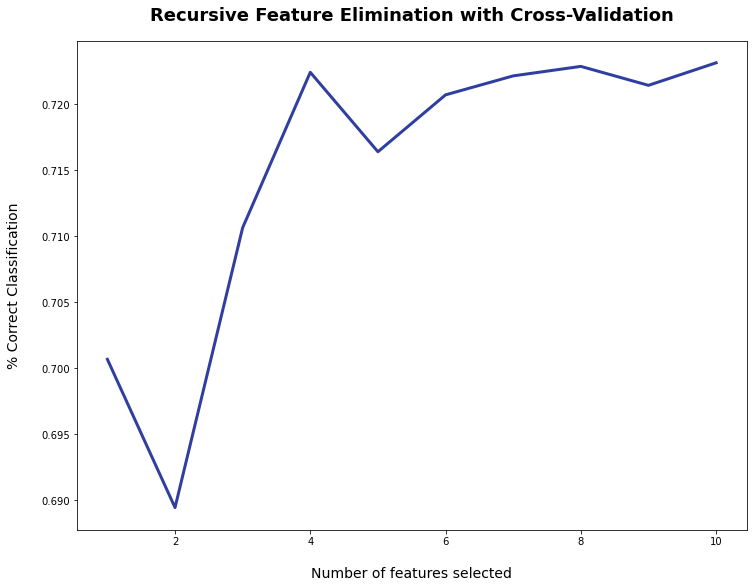

In [13]:
plt.figure(figsize=(12, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [14]:
# Least important features

print(np.where(rfecv.support_ == False)[0])

#Dropping the non-required features from training and test data
X_train.drop(X_train.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
X_test.drop(X_test.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[]


In [15]:
#Print features and feature importance
print("Features: ", X_train.columns)
print("Feature Importance: ", rfecv.estimator_.feature_importances_)

Features:  Index(['is__F', 'is__M', 'is__O', 'age', 'income_in_k', 'avg_difficulty',
       'avg_duration', 'avg_transaction_amt',
       'transactions_per_membership_days', 'days_as_member'],
      dtype='object')
Feature Importance:  [0.00913563 0.00509116 0.00272267 0.08311753 0.08081026 0.09941575
 0.09192994 0.32434191 0.1961609  0.10727427]


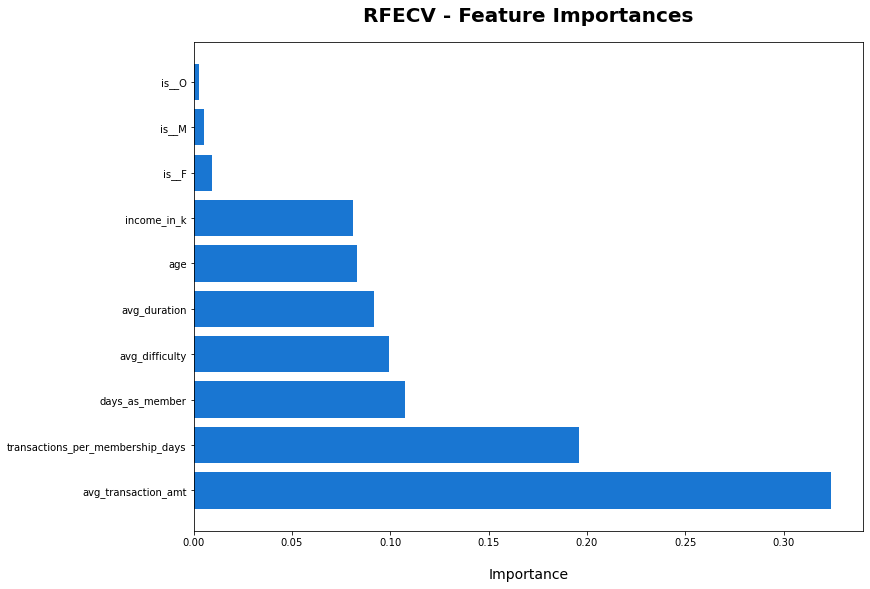

In [16]:
dset = pd.DataFrame()
dset['attr'] = X_train.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(12, 9))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

## Check if data is balanced

In [17]:
y_train.value_counts()

active     7240
passive    3878
Name: customer_type, dtype: int64

In [18]:
#Find percentage distribution
round((y_train.value_counts()/y_train.count())*100,2)

active     65.12
passive    34.88
Name: customer_type, dtype: float64

#### The target classes are imbalanced!

### SMOTE

In [19]:
#Applying SMOTE to oversample the minority class before modeling
oversample = SMOTE(random_state = 101)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [20]:
#check percentage distribution
round((y_train.value_counts()/y_train.count())*100,2)

active     50.0
passive    50.0
Name: customer_type, dtype: float64

In [21]:
y_train.value_counts()

active     7240
passive    7240
Name: customer_type, dtype: int64

In [22]:
#Changing active to 1 and passive to 0 to get f1 score
#Training data
y_train = y_train.replace(to_replace='active', value= 1)
y_train = y_train.replace(to_replace='passive', value= 0)

#Testing data
y_test = y_test.replace(to_replace='active', value= 1)
y_test = y_test.replace(to_replace='passive', value= 0)

In [23]:
y_train

0        1
1        0
2        1
3        1
4        0
        ..
14475    0
14476    0
14477    0
14478    0
14479    0
Name: customer_type, Length: 14480, dtype: int64

## Modeling and Prediction

In [24]:
#Use GridSearchCV to fit selected classifiers to compare the efficiencies of different models
def train_classifier(classifier, hyperparameters, X, y): 
    gridsearch = GridSearchCV(estimator=classifier, param_grid = hyperparameters, cv=5, verbose=1, scoring = 'f1')
    model_train = gridsearch.fit(X, y)
    print(classifier.__class__.__name__)
    print("Mean Accuracy:", round(model_train.score(X, y),4))
    print("F1: ",gridsearch.best_score_)
    return gridsearch.best_estimator_

In [54]:
# Initialize classification algorithms
# LogisticRegression
lor = LogisticRegression(random_state=42)
lor_est = train_classifier(lor,{}, X_train, y_train)

# RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc_est = train_classifier(rfc,{}, X_train, y_train)

# AdaBoostClassifier
abc = AdaBoostClassifier(random_state=42) 
abc_est = train_classifier(abc,{}, X_train, y_train)

# GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42) 
gbc_est = train_classifier(gbc,{}, X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


LogisticRegression
Mean Accuracy: 0.7184
F1:  0.7182902195379524
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.2s finished


RandomForestClassifier
Mean Accuracy: 1.0
F1:  0.8327462245387437
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.9s finished


AdaBoostClassifier
Mean Accuracy: 0.8057
F1:  0.7987283954018126
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.9s finished


GradientBoostingClassifier
Mean Accuracy: 0.83
F1:  0.8149264579216837


#### Highest f1 score is obtained for RandomForestClassifier

## Fine Tuning the Model

### Fine tuning RandomForestClassifier and GradientBosstingClassifier with the top set of F1 scores

In [29]:
#Tuning the RandomForestClassifier with hyperparameters to improve the accuracy score
hyperparameters = {'n_estimators': [1200],#[100, 120, 300, 500, 800, 1200], #sets the number of decision trees to be used in the forest
                  'max_depth': [25]#[5, 8, 15, 25, 30, None], #sets the max depth of the tree
                  #'min_samples_split': [1,2,5,10,15,100], #The minimum number of samples needed before a split
                  #'min_samples_leaf': [1,2,5,10] #The minimum number of samples needed to create a leaf (decision) node
             }

rfc = RandomForestClassifier(random_state=42)
rfc_best_est = train_classifier(rfc, hyperparameters, X_train, y_train)
print(rfc_best_est)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min finished


RandomForestClassifier
Mean Accuracy: 1.0
F1:  0.8355968774271408
RandomForestClassifier(max_depth=25, n_estimators=1200, random_state=42)


In [30]:
#Feature importances given by the best estimate RandomForestClassfier
rfc_best_est.feature_importances_

array([0.03858681, 0.03064862, 0.01118109, 0.07734005, 0.09460218,
       0.08783131, 0.08891747, 0.27040008, 0.1763676 , 0.12412477])

In [31]:
#Tuning the GradientBoostingClassifier with hyperparameters to improve the accuracy score
#learning_rate; default=0.1; shrinks the contribution of each tree by learning_rates
lr = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

#n_estimators, default=100, number of boosting stages to perform
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

#max_depth, default=3, maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree
max_depths = [5, 8, 15, 25, 30, None]

#min_samples_split, default=2, The minimum number of samples required to split an internal node
min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True)

#min_samples_leaf, default=1,The minimum number of samples required to be at a leaf node.
min_samples_leaf=np.linspace(0.1, 0.5, 5, endpoint=True)

#max_features{‘auto’, ‘sqrt’, ‘log2’}, default=None, The number of features to consider when looking for the best split:
max_features = list(range(1,X_train.shape[1]))

gb_tuned = GradientBoostingClassifier(random_state=42)
hyperparameters = {'learning_rate': [0.5], 'n_estimators': [200], 'max_depth': [15]}#, 'min_samples_split': min_samples_split, 'min_samples_leaf':min_samples_leaf, 'max_features':max_features}   
gb_best_est = train_classifier(gb_tuned, hyperparameters, X_train, y_train)
print(gb_best_est)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.4min finished


GradientBoostingClassifier
Mean Accuracy: 1.0
F1:  0.8388415772556079
GradientBoostingClassifier(learning_rate=0.5, max_depth=15, n_estimators=200,
                           random_state=42)


### After fine-tuning GradientBoostClassifier seems to have a higher f1 score than RandomForestClassifier!

## Prediction and Performance of Classifiers

In [32]:
#Print the shape of test data
print(X_test.shape)
print(y_test.shape)

(3707, 10)
(3707,)


### GradientBoostingClassifier

In [89]:
#Passing the test data to the GradientBoodtingClassifier estimator
y_pred_gbc = gb_best_est.predict(X_test)
y_pred_gbc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

#### F1 score

In [93]:
#f1 score of predicted data
f1_score_gbc = f1_score(y_test, y_pred_gbc)
print('F1 score of GradientBoodtingClassifier Prediction: ', f1_score_gbc)

F1 score of GradientBoodtingClassifier Prediction:  0.8530653266331658


#### Confusion Matrix

[[0.6519084  0.3480916 ]
 [0.11472674 0.88527326]]


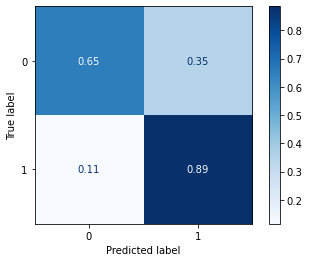

In [104]:
disp = plot_confusion_matrix(gb_best_est, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
print(disp.confusion_matrix)

plt.show()

#### F1 Scores have better values for test data!

### RandomForestClassifier

In [81]:
#Passing the test data to the RandomForestClassifier estimator
y_pred_rfc = rfc_best_est.predict(X_test)
y_pred_rfc

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

#### F1 Score

In [94]:
#f1 score of predicted data
f1_score = f1_score(y_test, y_pred_rfc)
print('F1 score of RandomForestClassifier Prediction: ', f1_score)

F1 score of RandomForestClassifier Prediction:  0.8475263584752637


#### Confusion Matrix

[[0.66030534 0.33969466]
 [0.12807676 0.87192324]]


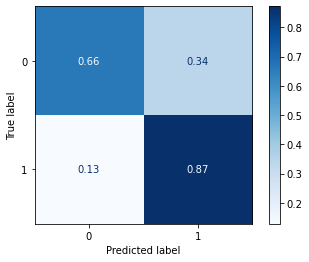

In [103]:
disp = plot_confusion_matrix(rfc_best_est, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
print(disp.confusion_matrix)

plt.show()

### AdaBoostClassifier

In [55]:
#Passing the test data to the AdaBoostClassifier estimator
y_pred_abc = abc_est.predict(X_test)
y_pred_abc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

#### F1 Score

In [97]:
#f1 score of predicted data
f1_score_abc = f1_score(y_test, y_pred_abc)
print('F1 score of AdaBoostClassifier Prediction: ', f1_score_abc)

F1 score of AdaBoostClassifier Prediction:  0.8349474551823615


#### Confusion Matrix

[[0.67175573 0.32824427]
 [0.1547768  0.8452232 ]]


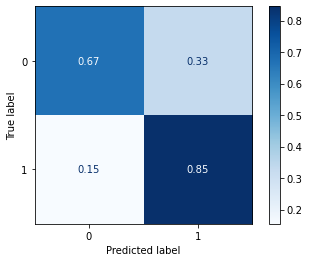

In [102]:
disp = plot_confusion_matrix(abc_est, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
print(disp.confusion_matrix)

plt.show()

### Logistic Regression

In [98]:
#Passing the test data to the Logistic Regressor
y_pred_lor = lor_est.predict(X_test)
y_pred_lor

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

#### F1 Score

In [99]:
#f1 score of predicted data
f1_score_lor = f1_score(y_test, y_pred_lor)
print('F1 score of LogisticRegression Prediction: ', f1_score_lor)

F1 score of LogisticRegression Prediction:  0.7494105037513397


#### Confusion Matrix 

[[0.60305344 0.39694656]
 [0.27075511 0.72924489]]


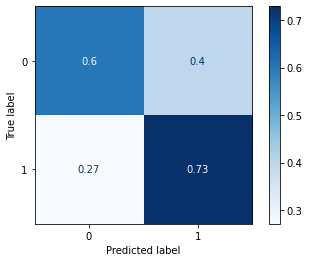

In [101]:
disp = plot_confusion_matrix(lor_est, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
print(disp.confusion_matrix)

plt.show()